In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
import seaborn as sns

In [123]:
'''
se define el indice Datetime para eliminar las columnas referentes a las fechas
de las erupciones y su hora de inicio. ademas se calculan las energias pasando 
los valores de la columna energy.KeV a dos valores float.
'''
file_path = r"C:\Python\HessiSolarFlare2018.csv"  #2002to2018.csv
df = pd.read_csv(file_path)
formatT = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['start.date'] + ' ' + df['start.time'], format=formatT)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df = df.drop(columns=['start.date', 'start.time', 'Datetime'])
Emin = []
Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Emin.append(float(result[0]))
    Eprom.append((float(result[0]) + float(result[1]))/2)
df['EnergiaMin']=Emin
df['EnergiaMax']=Emax
df['EnergiaProm']=Eprom
'''
Tomamos todas las banderas flags y las unimos en una sola columna llamada Flags
'''
df=df.fillna(value="")
df["Flags"]=df["flag.1"]+" "+df["flag.2"]+" "+df["flag.3"]+" "+df["flag.4"]\
+" "+df["flag.5"] 
for i in range (1,6): del df["flag."+str(i)]
'''
Hago un calculo de las freciencias de la energia Promedio, Aunque por ahora
no es muy pertinente para el analisis, tal vez si pueda hacerse algo después.
plank=4.135667696*pow(10,-15)
vluz=3*pow(10,8)
Frec=[]
long=[]
for i in df['EnergiaProm']:
    Frec.append(i/plank)
    long.append(vluz/(i/plank))
df['Frec']=Frec
df['Long']=long
'''
'''funcion filtro recibe un dataframe una columna del mismo (un string),
y una condición, retorna un dataframe filtrado por el condicional 
''' 
def Filtro(df,col,cond):
    a=df[col] == cond
    dfa=df[a]
    return dfa  


$$
\textbf{graficas y analisis de datos}
$$

In [166]:

'''hipotesis estadistica de eventos solares filtrados por rangos de energia"""
se filtran los datos con respecto al rango de las energias presentes 
en esas erupciones
'''
#df['energy.kev'].value_counts()
energy1 = Filtro(df,'energy.kev','6-12') # Se filtra por rango de energias
energy2 = Filtro(df,'energy.kev','12-25')
energy3 = Filtro(df,'energy.kev','25-50')
energy4 = Filtro(df,'energy.kev','50-100')
dfe=pd.concat([energy1,energy2,energy3]).sort_values('Datetime')
dfdt = dfe['duration.s']
dfep = dfe['EnergiaProm']
datos4 = energy4['duration.s']
'''diagrama de caja y bigote para la duracion 
de las eripciones con respecto a los rangos de energia'''
#plt.boxplot(datos)
#plt.figure(figsize=(4,4), dpi = 150)
#sns.boxplot(data=df.sort_values('EnergiaProm'),y='duration.s',x='energy.kev',hue='energy.kev')
#energy1.describe()

PearsonRResult(statistic=0.35591574107899954, pvalue=0.0)

$$
 \textbf{grafica de la posición de las erupciones clasificada por sus energias}
$$

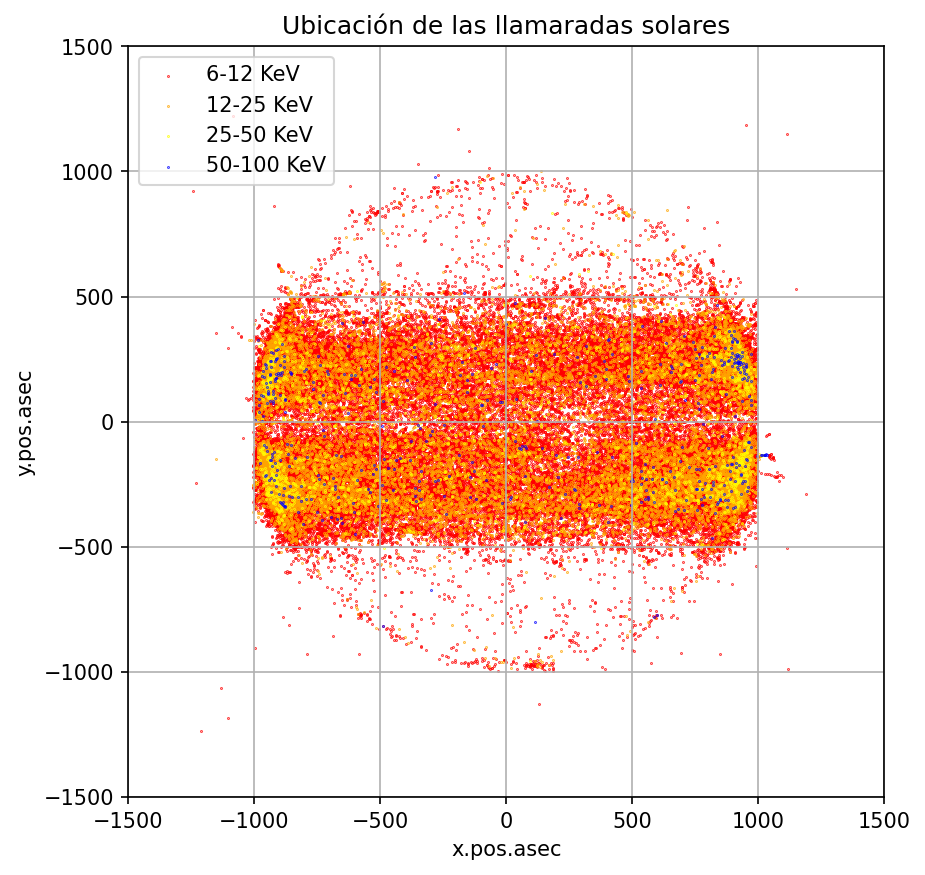

In [125]:
'''
scatter de las posiciones x.pos.asec y y.pos.asec
de cada rango de energias mayores al rango 3-6 kev
probablamente mejor con un cmap
'''
plt.figure(figsize=(6.5,6.5), dpi = 150, edgecolor='black')
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.grid()
plt.title('Ubicación de las llamaradas solares')
plt.ylabel('y.pos.asec')
plt.xlabel('x.pos.asec')
plt.scatter(energy1['x.pos.asec'], energy1['y.pos.asec'],s=0.1, color='red', label='6-12 KeV')
plt.scatter(energy2['x.pos.asec'], energy2['y.pos.asec'],s=0.1, color='orange',label='12-25 KeV')
plt.scatter(energy3['x.pos.asec'], energy3['y.pos.asec'],s=0.1, color='yellow',label='25-50 KeV')
plt.scatter(energy4['x.pos.asec'], energy4['y.pos.asec'],s=0.1, color='blue', label='50-100 KeV')
plt.legend()

$$
\textbf{Matriz de correlación}
$$

<AxesSubplot:title={'center':'Mapa de calor con respecto \n a la correlación de la base de datos'}>

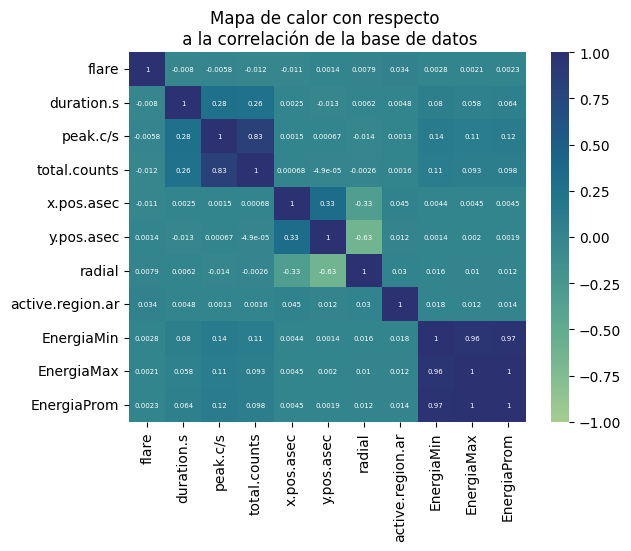

In [126]:
'''se trabaja un mapa de calor para la 
   matriz  de correlación'''

matriz=df.corr(method='pearson',numeric_only=float)
plt.title('Mapa de calor con respecto \n a la correlación de la base de datos')
sns.heatmap(matriz,cmap='crest',annot=True,
           annot_kws={'fontsize':5}
           ,vmin=-1,vmax=1)

C:\Users\Juan Jimenez\AppData\Local\Temp\ipykernel_16428\627140204.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df.sort_values('EnergiaProm'),x='duration.ls',hue='energy.kev')


431.9673178730091


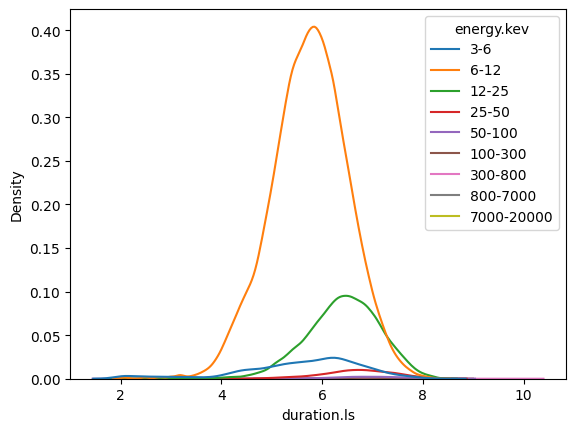

In [143]:
'''
ley de struggle e histograma
'''
k=1+np.log2(len(df['duration.s']))
dff=df[df['energy.kev'] != '3-6']
df['duration.ls']=np.log(df['duration.s'])
sns.kdeplot(data=df.sort_values('EnergiaProm'),x='duration.ls',hue='energy.kev')
sns.histplot(data=dff.sort_values('Datetime'),x='duration.s',hue='energy.kev',bins=int(k),kde=True)
print(vardff)

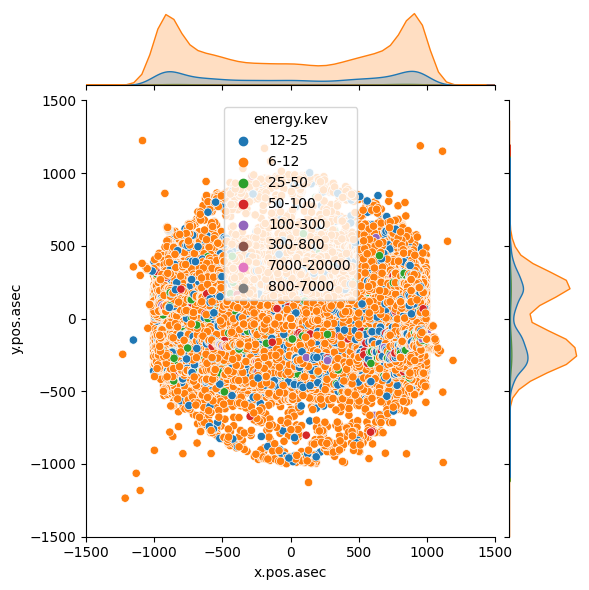

In [128]:
sns.jointplot(dff.sort_values('Datetime'), x='x.pos.asec',y='y.pos.asec',kind='scatter',hue='energy.kev',xlim=(-1500,1500),ylim=(-1500,1500))

<AxesSubplot:xlabel='x.pos.asec', ylabel='Count'>

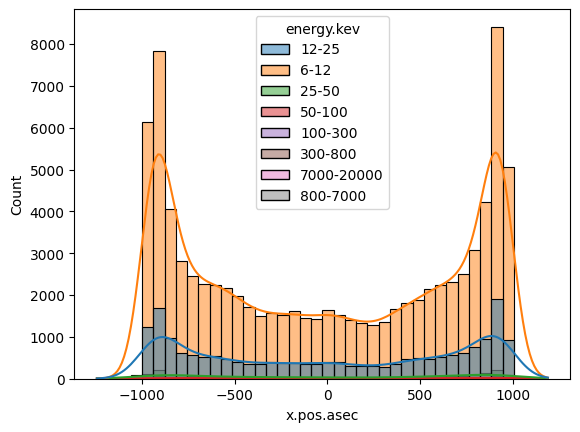

In [94]:
dffx=dff[dff['x.pos.asec'] > -1500]
dffy=dff[dff['y.pos.asec'] > -1500]
sns.histplot(data=dffx.sort_values('Datetime'),x='x.pos.asec',hue='energy.kev',kde=True)

C:\Users\Juan Jimenez\AppData\Local\Temp\ipykernel_16428\3617916662.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dffy.sort_values('Datetime'),x='x.pos.asec',y='y.pos.asec',hue='energy.kev')
C:\Users\Juan Jimenez\AppData\Local\Temp\ipykernel_16428\3617916662.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dffy.sort_values('Datetime'),x='x.pos.asec',y='y.pos.asec',hue='energy.kev')
C:\Users\Juan Jimenez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


2.5490822538563647


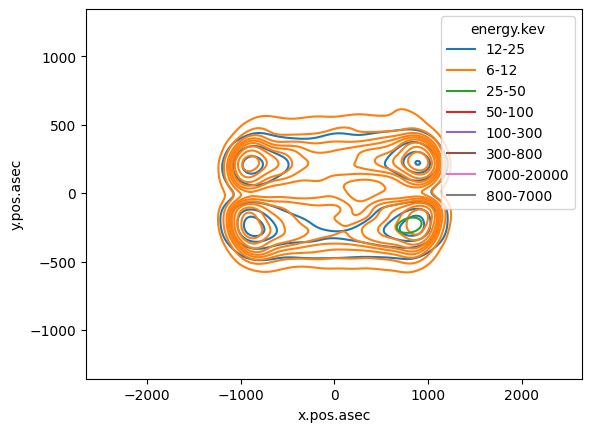

In [139]:
sns.kdeplot(data=dffy.sort_values('Datetime'),x='x.pos.asec',y='y.pos.asec',hue='energy.kev')
var=np.mean(dffx['x.pos.asec'])
print(var)

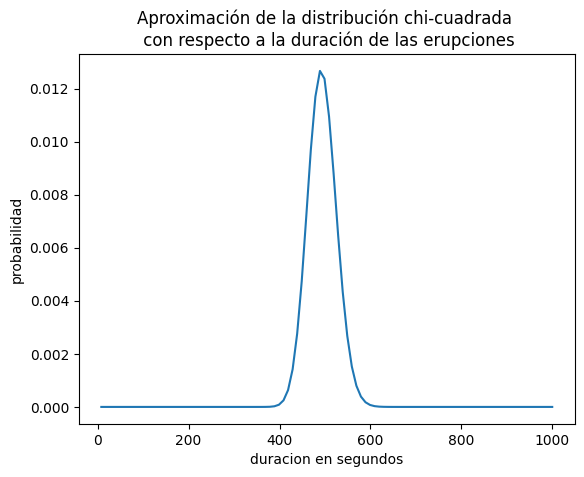

In [275]:
sigma=df['duration.s'].std()
mu=df['duration.s'].mean()
beta=mu/sigma
gamma = stats.chi2(mu)
x = np.linspace(df['duration.s'].min(),1000, 100)
fp = gamma.pdf(x)
plt.plot(x, fp)
plt.title('Aproximación de la distribución chi-cuadrada \n con respecto a la duración de las erupciones')
plt.ylabel('probabilidad')
plt.xlabel('duracion en segundos')
plt.show()